In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import random
import warnings

In [2]:
data=pd.read_csv("England dataset.csv")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,29,21,17,6,1,16986,17662,16263.54167,17919
1,29,21,18,6,1,18084,19097,16256.83333,18936
2,28,21,19,6,1,17798,18973,16242.83333,18637
3,28,20,20,6,1,17269,18556,16220.50000,18020
4,27,20,21,6,1,16658,17956,16196.79167,17387


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler=MinMaxScaler()

In [5]:
data[["col 0"]] = scaler.fit_transform(data[["Unnamed: 0"]])
data[["col 1"]] = scaler.fit_transform(data[["Unnamed: 1"]])
data[["col 2"]] = scaler.fit_transform(data[["Unnamed: 2"]])
data[["col 3"]] = scaler.fit_transform(data[["Unnamed: 3"]])
data[["col 4"]] = scaler.fit_transform(data[["Unnamed: 4"]])
data[["col 5"]] = scaler.fit_transform(data[["Unnamed: 5"]])
data[["col 6"]] = scaler.fit_transform(data[["Unnamed: 6"]])
data[["col 7"]] = scaler.fit_transform(data[["Unnamed: 7"]])
data[["col 8"]] = scaler.fit_transform(data[["Unnamed: 8"]])

In [6]:
data=data.drop(columns=["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"])

In [7]:
data.head

<bound method NDFrame.head of          col 0     col 1     col 2     col 3  col 4     col 5     col 6  \
0     0.326087  0.361446  0.695652  0.833333    1.0  0.494770  0.536862   
1     0.326087  0.361446  0.739130  0.833333    1.0  0.563138  0.626214   
2     0.315217  0.361446  0.782609  0.833333    1.0  0.545330  0.618493   
3     0.315217  0.349398  0.826087  0.833333    1.0  0.512391  0.592528   
4     0.304348  0.349398  0.869565  0.833333    1.0  0.474346  0.555168   
...        ...       ...       ...       ...    ...       ...       ...   
8715  0.315217  0.409639  0.826087  0.666667    1.0  0.451183  0.622167   
8716  0.304348  0.409639  0.869565  0.666667    1.0  0.424097  0.582379   
8717  0.304348  0.409639  0.913043  0.666667    1.0  0.399066  0.517061   
8718  0.304348  0.397590  0.956522  0.666667    1.0  0.356102  0.427958   
8719  0.304348  0.397590  1.000000  0.666667    1.0  0.296575  0.337858   

         col 7     col 8  
0     0.534505  0.552864  
1     0.533760 

In [8]:
inputs=data.iloc[:,0:8]
output=data.iloc[:,8]

In [9]:
inputs.head()

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7
0,0.326087,0.361446,0.695652,0.833333,1.0,0.494770,0.536862,0.534505
1,0.326087,0.361446,0.739130,0.833333,1.0,0.563138,0.626214,0.533760
2,0.315217,0.361446,0.782609,0.833333,1.0,0.545330,0.618493,0.532205
3,0.315217,0.349398,0.826087,0.833333,1.0,0.512391,0.592528,0.529725
4,0.304348,0.349398,0.869565,0.833333,1.0,0.474346,0.555168,0.527092


In [10]:
output.head()

0    0.552864
1    0.616189
2    0.597572
3    0.559153
4    0.519738
Name: col 8, dtype: float64

In [11]:
inputs=inputs.replace(r'^\s*$', np.nan, regex=True)
print(inputs)

         col 0     col 1     col 2     col 3  col 4     col 5     col 6  \
0     0.326087  0.361446  0.695652  0.833333    1.0  0.494770  0.536862   
1     0.326087  0.361446  0.739130  0.833333    1.0  0.563138  0.626214   
2     0.315217  0.361446  0.782609  0.833333    1.0  0.545330  0.618493   
3     0.315217  0.349398  0.826087  0.833333    1.0  0.512391  0.592528   
4     0.304348  0.349398  0.869565  0.833333    1.0  0.474346  0.555168   
...        ...       ...       ...       ...    ...       ...       ...   
8715  0.315217  0.409639  0.826087  0.666667    1.0  0.451183  0.622167   
8716  0.304348  0.409639  0.869565  0.666667    1.0  0.424097  0.582379   
8717  0.304348  0.409639  0.913043  0.666667    1.0  0.399066  0.517061   
8718  0.304348  0.397590  0.956522  0.666667    1.0  0.356102  0.427958   
8719  0.304348  0.397590  1.000000  0.666667    1.0  0.296575  0.337858   

         col 7  
0     0.534505  
1     0.533760  
2     0.532205  
3     0.529725  
4     0.527092

In [12]:
inputs.shape

(8720, 8)

In [13]:
output.shape

(8720,)

In [14]:
def GREY_WOLF(X_train,X_test,y_train,y_test,pop_len=10,num=200):
    lb=0.01
    ub=10
    dim=2
    no_inputs=X_train.shape[1]
    pos=np.dot(np.random.rand(pop_len,2),(ub-lb))+lb
    convergence_curve=[]
    iterations=[]
    
    gBestScore=float("inf")
    gBest=np.zeros(2)
    
    alpha_score=float("inf")
    alpha_pos=np.zeros(dim)
    
    beta_score=float("inf")
    beta_pos=np.zeros(dim)
    
    delta_score=float("inf")
    delta_pos=np.zeros(dim)
    for l in range(0,num+1):
        for i in range(0,(pos.shape[0])):
            rbf_svr = svm.SVR(kernel = 'rbf', C = pos[i][0], gamma = pos[i][1]).fit(X_train, y_train)
            y_pred = rbf_svr.predict(X_train)
            fitness = mean_squared_error(y_train, y_pred)
            
            if gBestScore > fitness:
                gBestScore = fitness
                for j in range(0,(pos.shape[1])):
                    gBest[j]=pos[i,j]
            if fitness<alpha_score:
                alpha_score=fitness
                alpha_pos=pos[i,:].copy()
            if fitness>alpha_score and fitness<beta_score:
                beta_score=fitness
                beta_pos=pos[i,:].copy()
            if fitness>alpha_score and fitness>beta_score and fitness<delta_score:
                delta_score=fitness
                delta_pos=pos[i,:].copy()
        convergence_curve.append(gBestScore)
        a=2-l*((2)/num)
        for i in range(0,(pos.shape[0])):
            for j in range(0,(pos.shape[1])):
                
                r1=random.random()
                r2=random.random()
                
                A1=(2*a*r1)-a
                C1=2*r2
                D_alpha=abs((C1*alpha_pos[j])-pos[i,j])
                x1=alpha_pos[j]-A1*D_alpha
                
                r1=random.random()
                r2=random.random()
                
                A2=(2*a*r2)-a
                C2=2*r2
                D_beta=abs((C2*beta_pos[j])-pos[i,j])
                x2=beta_pos[j]-A2*D_beta
                
                r1=random.random()
                r2=random.random()
                
                A3=(2*a*r2)-a
                C3=2*r2
                D_delta=abs((C3*delta_pos[j])-pos[i,j])
                x3=delta_pos[j]-A3*D_delta
                
                pos[i,j]=(x1+x2+x3)/3
        iterations.append(l)
        for i in range(0,(pos.shape[0])):
            for j in range(0,(pos.shape[1])):
                if pos[i,j]>ub or pos[i,j]<lb:
                    pos[i,j]=random.uniform(0.01,10);
        print('----------------Count of iterations----------------' + str(l))
        print(pos)
        print('C and gamma:' + str(gBest))
        print('mean squared error:' + str(gBestScore))
       
    return convergence_curve,gBest,gBestScore,iterations

In [15]:
X_train,X_test,y_train,y_test= train_test_split(inputs,output, test_size = 0.2, random_state = 0)

In [16]:
convergence_curve,gbest,gbestscore,iterations =GREY_WOLF(X_train,X_test,y_train,y_test) 
best_C=gbest[0]
best_gamma=gbest[1]

----------------Count of iterations----------------0
[[2.01915045 0.47626452]
 [9.98869633 1.92475728]
 [5.58468749 6.46035388]
 [6.81379837 1.0748947 ]
 [3.27041855 0.53456394]
 [5.37268685 3.14465652]
 [0.72874778 0.2789686 ]
 [6.90932293 2.23975584]
 [3.93095747 0.3636351 ]
 [1.61946385 2.8489171 ]]
C and gamma:[6.44856132 0.83824073]
mean squared error:0.00182502052417897
----------------Count of iterations----------------1
[[4.09097553 1.32712005]
 [7.15685643 0.07599902]
 [2.57313614 7.93485534]
 [3.48912759 9.96529126]
 [4.73989945 0.07647531]
 [7.13613664 5.88915561]
 [4.1556542  7.57576142]
 [1.63910392 0.49846967]
 [3.53001424 1.12393338]
 [5.05116327 0.13705631]]
C and gamma:[3.93095747 0.3636351 ]
mean squared error:0.001731090771653172
----------------Count of iterations----------------2
[[6.62022549 5.96778243]
 [8.07282328 0.74876965]
 [2.54615678 9.06700391]
 [1.04158294 6.80780663]
 [5.73102206 0.25551983]
 [8.26923583 2.04121618]
 [6.51631505 4.82874475]
 [2.68238877 

----------------Count of iterations----------------22
[[4.09250212 0.20594738]
 [7.40289031 4.69372614]
 [8.20524675 7.0355148 ]
 [3.62817397 0.26736962]
 [1.56774993 0.22498187]
 [7.41947523 0.15555363]
 [4.35228205 0.31816896]
 [5.2333136  0.01755838]
 [7.04680665 0.3174602 ]
 [4.97661031 0.52037088]]
C and gamma:[8.38755907 0.15416839]
mean squared error:0.001628620699126459
----------------Count of iterations----------------23
[[4.821876   0.18138998]
 [7.72472694 1.57224811]
 [6.58671521 5.41378252]
 [4.41872683 0.18190029]
 [3.65878146 0.18779179]
 [7.42270065 8.57948745]
 [4.02973724 0.23519808]
 [4.43583484 9.96414798]
 [6.54303964 0.34189381]
 [2.66123817 0.16217756]]
C and gamma:[7.41947523 0.15555363]
mean squared error:0.0016210520042461726
----------------Count of iterations----------------24
[[8.79649581 0.18422034]
 [9.38753165 0.38608848]
 [5.04413698 7.85380498]
 [9.07800199 0.21388975]
 [9.36941168 0.23068489]
 [6.14728609 0.47502153]
 [5.7357934  0.19704455]
 [6.6526

----------------Count of iterations----------------44
[[6.22157744 0.16162418]
 [6.37293177 0.0177988 ]
 [5.41624029 0.15282371]
 [5.29168236 0.18075964]
 [7.41331877 0.18302762]
 [9.40949751 0.11187066]
 [5.08438374 0.02336761]
 [7.59952598 0.12720933]
 [7.56947266 0.13917884]
 [6.4098083  0.44982811]]
C and gamma:[7.72594822 0.1533131 ]
mean squared error:0.0016194499526442918
----------------Count of iterations----------------45
[[5.21813063 0.13580125]
 [2.78268327 0.1092742 ]
 [7.54609551 0.12389674]
 [3.68537291 0.17470158]
 [1.93390078 0.13054369]
 [9.10369344 0.08718367]
 [8.86617612 0.17783663]
 [9.72279534 2.10033685]
 [7.56274055 0.13826182]
 [3.86875187 0.37421077]]
C and gamma:[7.72594822 0.1533131 ]
mean squared error:0.0016194499526442918
----------------Count of iterations----------------46
[[5.6028577  0.14088097]
 [4.40673266 0.18460559]
 [0.25621522 0.07040726]
 [8.58372172 0.17846028]
 [5.9606889  0.13236134]
 [1.11900751 0.1843433 ]
 [7.67271953 0.12911596]
 [4.772

----------------Count of iterations----------------66
[[7.12061094 0.13200031]
 [1.66680116 0.11330086]
 [5.09439808 0.22938786]
 [7.55018405 0.12296912]
 [5.65290378 0.2026907 ]
 [8.30954451 0.12288434]
 [5.33454638 0.2376225 ]
 [8.81822068 0.21402796]
 [4.36359278 0.08209728]
 [6.46741638 0.14099689]]
C and gamma:[9.60513248 0.13886677]
mean squared error:0.0016134794600213855
----------------Count of iterations----------------67
[[8.04927822 0.18018204]
 [8.21896425 0.13054205]
 [1.72913131 0.12838714]
 [9.86507474 0.13744185]
 [7.67250902 0.14333906]
 [7.37588028 0.13874655]
 [9.85762414 0.13557591]
 [3.18679078 0.21288462]
 [3.45420489 0.08350692]
 [6.88059113 0.10087826]]
C and gamma:[9.60513248 0.13886677]
mean squared error:0.0016134794600213855
----------------Count of iterations----------------68
[[7.34655948 0.14165897]
 [8.60854326 0.0509101 ]
 [9.06939223 0.10377931]
 [8.50470577 0.13520953]
 [6.65428448 0.11630672]
 [8.85921058 0.19371361]
 [1.98035629 0.13556003]
 [8.730

----------------Count of iterations----------------88
[[6.05213173 0.18775984]
 [8.02720612 0.17613583]
 [9.1999085  0.11231014]
 [6.9276964  0.14801467]
 [9.48721671 0.12690935]
 [9.91855935 0.18112068]
 [3.30157132 0.14785667]
 [3.57297463 0.177203  ]
 [6.44624485 0.07430976]
 [8.02248173 0.26818267]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------89
[[1.49854752 0.17547822]
 [7.04156507 0.12126069]
 [3.91995043 0.13161704]
 [7.03300526 0.08436901]
 [3.42002908 0.07374632]
 [6.00282253 0.22626576]
 [3.56651066 0.17092334]
 [5.31060472 0.17032232]
 [7.01760459 0.17774721]
 [4.7758622  0.22610416]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------90
[[9.86917539 0.25249983]
 [4.52453185 0.19774246]
 [9.64508768 0.15169868]
 [9.97116638 0.10652542]
 [5.67681904 0.21208267]
 [3.15780796 0.17372778]
 [6.52224536 0.13853785]
 [9.265

----------------Count of iterations----------------110
[[8.97900721 0.17103053]
 [7.60910118 0.23140124]
 [7.70052948 0.15724452]
 [4.48165647 0.10657046]
 [5.317624   0.1072947 ]
 [9.49700112 0.14735933]
 [6.63572477 0.10240952]
 [5.63823676 0.17947503]
 [7.57588074 0.10198619]
 [4.83554368 0.16581015]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------111
[[9.05494844 0.13945993]
 [2.37501994 0.13775099]
 [5.42144557 0.13485843]
 [7.95377684 0.14928881]
 [9.81627595 0.10646045]
 [8.64365693 0.14744714]
 [6.79086571 0.07769219]
 [9.7751345  0.14430484]
 [2.76522098 0.17972324]
 [5.8166866  0.17470715]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------112
[[4.63877621 0.12072004]
 [7.64511082 0.13450965]
 [6.65029498 0.11652962]
 [6.99020915 0.16121124]
 [8.38257891 0.18994635]
 [7.80290466 0.18814612]
 [3.41544315 0.12242479]
 [6.

----------------Count of iterations----------------132
[[9.77935151 0.10843354]
 [9.28478818 0.10054225]
 [7.57129881 0.18903914]
 [7.59602246 0.14240992]
 [9.59233523 0.14405408]
 [9.67818336 0.11344232]
 [7.73619794 0.1459712 ]
 [9.38821595 0.16146692]
 [5.22193176 0.17402755]
 [4.01050913 0.11972521]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------133
[[2.40071308 0.15031409]
 [9.51958014 0.1356732 ]
 [8.979617   0.15261196]
 [2.02554676 0.15649976]
 [3.3849198  0.17894002]
 [9.13727422 0.15906832]
 [6.31198822 0.14328993]
 [3.53106319 0.18845551]
 [4.03347991 0.1183778 ]
 [6.14044224 0.13401804]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------134
[[8.93930779 0.1316855 ]
 [1.02221933 0.1528717 ]
 [8.70135991 0.15965993]
 [8.59405736 0.15689277]
 [9.57270919 0.14701814]
 [8.57536999 0.15964494]
 [8.72567119 0.12119061]
 [7.

----------------Count of iterations----------------154
[[9.67190436 0.1401282 ]
 [8.77248945 0.14963778]
 [6.39922819 0.13738971]
 [9.45623904 0.14115076]
 [9.80513732 0.14917286]
 [8.16754798 0.15093228]
 [5.77757507 0.13819275]
 [7.7868321  0.13381497]
 [9.79937859 0.15585559]
 [0.38775658 0.13859997]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------155
[[6.03439924 0.14355971]
 [9.43184039 0.13402482]
 [7.76716748 0.10427108]
 [8.75549246 0.13585592]
 [9.61429054 0.1518283 ]
 [9.02867582 0.14523115]
 [2.34779822 0.13875512]
 [6.20979056 0.12880145]
 [8.79442028 0.13909153]
 [5.10902225 0.13515089]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------156
[[8.6533339  0.1373903 ]
 [8.1854811  0.15831596]
 [8.89253787 0.10900201]
 [7.86764055 0.13776017]
 [8.65476619 0.13700865]
 [9.46186716 0.14969673]
 [9.37068072 0.1518483 ]
 [9.

----------------Count of iterations----------------176
[[9.17991471 0.15492326]
 [9.09743973 0.14392262]
 [4.52904351 0.14857825]
 [9.28382348 0.14739136]
 [8.4538298  0.14732256]
 [9.63206346 0.14576878]
 [9.6769026  0.14779255]
 [9.28668591 0.14200044]
 [9.90039319 0.14776443]
 [5.12697302 0.14320859]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------177
[[8.4904252  0.14858911]
 [8.9153419  0.13840768]
 [9.63941193 0.13102661]
 [8.86337357 0.14290577]
 [9.54024466 0.13871172]
 [9.98186312 0.13933402]
 [9.79776025 0.13627376]
 [5.65724129 0.14088836]
 [4.98249014 0.14863701]
 [7.92578449 0.12640596]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------178
[[9.86180106 0.13462785]
 [8.83732546 0.15083873]
 [9.64062266 0.15041658]
 [9.69790061 0.14079937]
 [8.78228322 0.13090349]
 [4.63747218 0.15293322]
 [9.22196103 0.12563898]
 [5.

----------------Count of iterations----------------198
[[9.65188604 0.13873187]
 [9.80607395 0.13856167]
 [9.68591485 0.13896271]
 [9.74143959 0.13799999]
 [9.76875877 0.14016187]
 [9.81144686 0.13920162]
 [9.8126631  0.13967289]
 [9.75859457 0.13925504]
 [9.73860959 0.13807239]
 [9.7176961  0.14004056]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------199
[[9.74194857 0.13986398]
 [9.75278552 0.1392521 ]
 [9.77427887 0.13969701]
 [9.77211292 0.13885689]
 [9.76574178 0.13899219]
 [9.73670952 0.13974166]
 [9.74800617 0.13887969]
 [9.75060525 0.13928101]
 [9.71450484 0.13969683]
 [9.78582507 0.13992686]]
C and gamma:[9.64901908 0.14009669]
mean squared error:0.0016075012395268668
----------------Count of iterations----------------200
[[9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.75190369 0.13935063]
 [9.

In [17]:
print('----------------4. The result shows-----------------')
print("The best C is " + str(best_C))
print("The best gamma is " + str(best_gamma))
print("......gBest...")
print(gbest)
print("........convergence_curve.........")
print(convergence_curve)

----------------4. The result shows-----------------
The best C is 9.649019084607033
The best gamma is 0.1400966869100637
......gBest...
[9.64901908 0.14009669]
........convergence_curve.........
[0.00182502052417897, 0.001731090771653172, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016538137119199408, 0.0016517760049976592, 0.0016517760049976592, 0.0016517760049976592, 0.0016370000808184162, 0.0016370000808184162, 0.0016349666703099055, 0.001628620699126459, 0.0016210520042461726, 0.0016210520042461726, 0.0016210520042461726, 0.0016210520042461726, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.0016194499526442918, 0.

In [18]:

rbf_svr = svm.SVR(kernel = 'rbf', C = best_C, gamma = best_gamma).fit(X_train, y_train) 
y_pred =rbf_svr.predict(X_test)
y_pred=y_pred.reshape(-1,1)

y_pred=scaler.inverse_transform(y_pred)
print(y_pred)
accuracies = cross_val_score(rbf_svr,X_test,y_test,cv =3, scoring='neg_mean_squared_error')
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
print(y_test)

[[18705.58194857]
 [10445.47162829]
 [13205.44808119]
 ...
 [16162.60423707]
 [17802.36462764]
 [13515.33644773]]
[[18746.]
 [ 9889.]
 [14192.]
 ...
 [16269.]
 [17109.]
 [13116.]]


In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization")
print("MSE =", mse)
print("MAPE  = ",mape*100)

SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization
MSE = 409231.09142368654
MAPE  =  3.668931954509386


Text(0, 0.5, 'error')

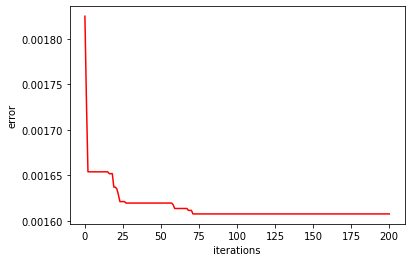

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(iterations,convergence_curve,color='red')
plt.xlabel('iterations')
plt.ylabel('error')